In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/week6/Classification Datsets/Classification Datsets/Hotel Reservations/Hotel Reservations.csv')

In [5]:
df.shape

(36275, 19)

In [6]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


In [10]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

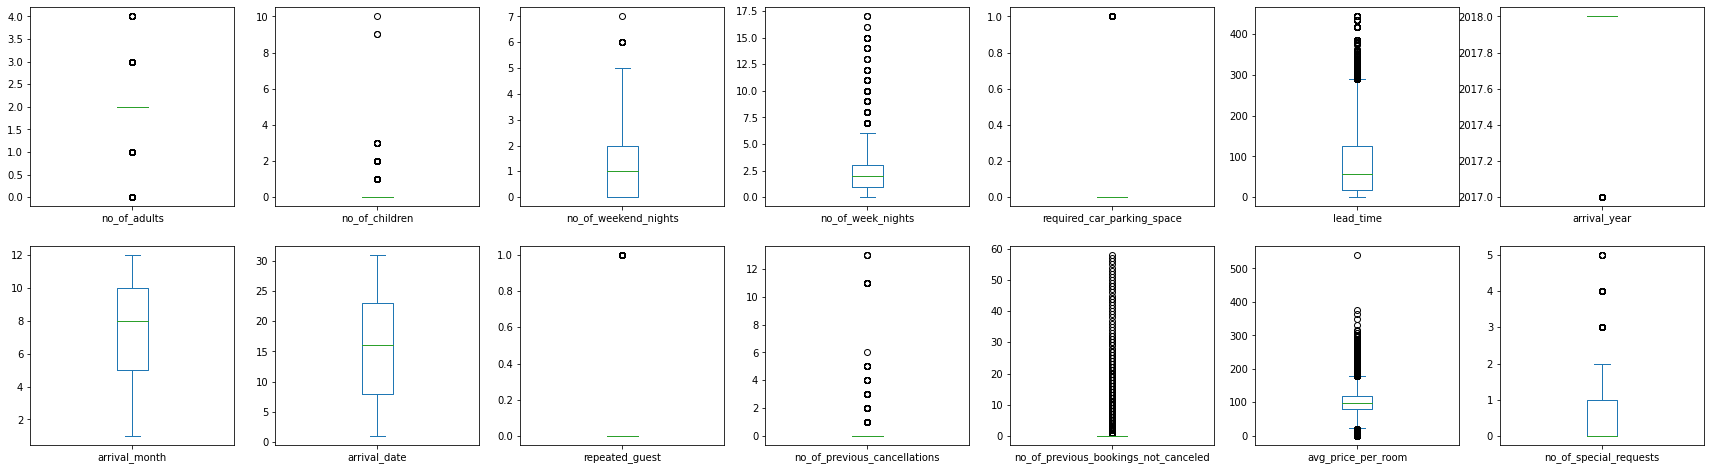

In [12]:
df.plot(kind='box',subplots=True,layout=(7,7),figsize=(30,30))
plt.show()
     

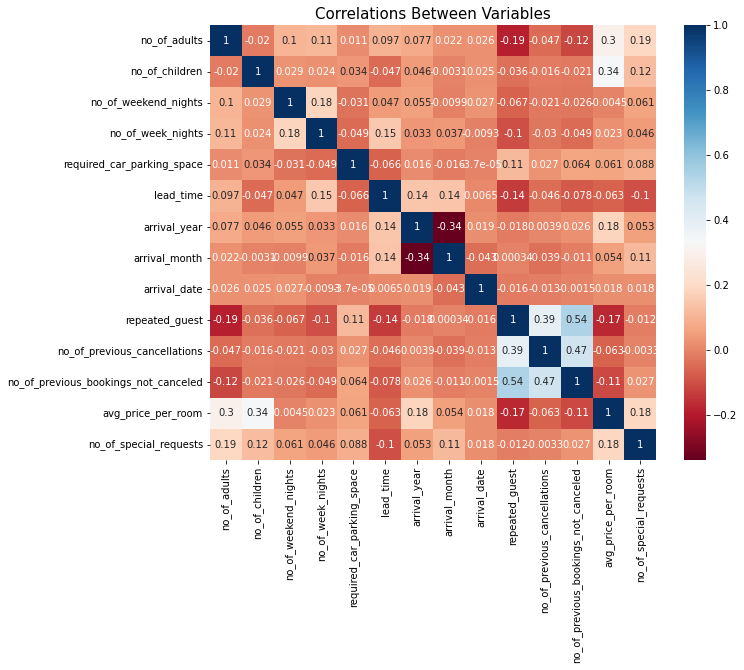

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show() 

In [14]:
num=df._get_numeric_data() 
num.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0


In [15]:
num.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [16]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [17]:
cat=df.drop(num,axis=1)
cat.head()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,INN00001,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,INN00002,Not Selected,Room_Type 1,Online,Not_Canceled
2,INN00003,Meal Plan 1,Room_Type 1,Online,Canceled
3,INN00004,Meal Plan 1,Room_Type 1,Online,Canceled
4,INN00005,Not Selected,Room_Type 1,Online,Canceled


In [18]:
df["booking_status"] = df["booking_status"].replace({"Canceled": 0, "Not_Canceled": 1})

In [19]:
cat=df.drop(num,axis=1)
cat.head()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,INN00001,Meal Plan 1,Room_Type 1,Offline,1
1,INN00002,Not Selected,Room_Type 1,Online,1
2,INN00003,Meal Plan 1,Room_Type 1,Online,0
3,INN00004,Meal Plan 1,Room_Type 1,Online,0
4,INN00005,Not Selected,Room_Type 1,Online,0


In [20]:
df['type_of_meal_plan'].unique() 

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [21]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [22]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [23]:
df=df.drop(['Booking_ID','avg_price_per_room','no_of_previous_bookings_not_canceled','no_of_previous_cancellations','arrival_month'], axis=1)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_date,market_segment_type,repeated_guest,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,2,Offline,0,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,6,Online,0,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,28,Online,0,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,20,Online,0,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,11,Online,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,3,Online,0,1,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,17,Online,0,2,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,1,Online,0,2,1
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,21,Online,0,0,0


In [24]:

# Convert categorical columns into dummy variables
cat_cols = ['type_of_meal_plan' ,'room_type_reserved','market_segment_type']
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

# Drop the original categorical columns
df.drop(columns=cat_cols, inplace=True)

# Print the updated dataframe
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_date,repeated_guest,no_of_special_requests,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,2,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,6,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,28,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,20,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,11,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
df.shape

(36275, 24)

In [26]:

class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None
        
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        
    def transform(self, X):
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [27]:
num = (['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_date', 'repeated_guest', 'no_of_special_requests'])
X_train_num = df[num]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(X_train_num)

# Scale the numerical features in the training set
df[num] = scaler.transform(X_train_num)


In [28]:
# Separate the target variable from the input features
y = df['booking_status']
X = df.drop('booking_status', axis=1) #axis=1 the operation is performed along the columns

In [29]:
# Split the data into training and test sets
train_size = int(len(df) * 0.7) # 70% of the data is used for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print the size of each set
print('Training data:', len(X_train))
print('test data:', len(X_test))

Training data: 25392
test data: 10883


In [30]:
X_train.shape

(25392, 23)

In [31]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()


In [32]:
class NeuralNetwork:
    def __init__(self, num_features):
        self.weights1 = np.random.rand(6, num_features)
        self.weights2 = np.random.rand(1, 6)
  

    def forward(self, X):
        self.hidden_layer = sigmoid(np.dot(X, self.weights1.T))
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights2.T))
        return self.output_layer
    
    def train(self, X_train, y_train, lr, epochs):
        y_train = y_train.values.reshape(-1, 1)  # convert to numpy array and reshape
        for i in range(epochs):
            # forward propagation
            output = self.forward(X_train)

            # calculate error
            error = y_train - output

            # backpropagation
            output_derivative = output * (1 - output)
            hidden_layer_derivative = self.hidden_layer * (1 - self.hidden_layer)
            delta2 = error * output_derivative
            delta1 = np.dot(delta2, self.weights2) * hidden_layer_derivative

            # update weights
            self.weights2 += lr * np.dot(delta2.T, self.hidden_layer)
            self.weights1 += lr * np.dot(delta1.T, X_train)



In [33]:
nn = NeuralNetwork(num_features=23)
nn.train(X_train, y_train, lr=0.01, epochs=100)

In [34]:
y_pred = nn.forward(X_train)

# convert predictions to binary (0 or 1) using a threshold value of 0.5
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# compare predictions to actual labels and calculate accuracy
accuracy = np.mean(y_pred_binary == y_train.values.reshape(-1, 1))
print('Train accuracy:', accuracy)

Train accuracy: 0.8052142407057341


In [35]:
y_pred_t = nn.forward(X_test)

# convert predictions to binary (0 or 1) using a threshold value of 0.5
y_pred_binary_t = np.where(y_pred_t >= 0.5, 1, 0)

# compare predictions to actual labels and calculate accuracy
accuracy = np.mean(y_pred_binary_t == y_test.values.reshape(-1, 1))
print('Test accuracy:', accuracy)

Test accuracy: 0.7926123311586879


In [36]:
# assume X_test and y_test are the test dataset and labels
# predict labels using traine

# create confusion matrix
confusion_matrix = np.zeros((2, 2))
for i in range(len(y_test)):
    true_label = int(y_test.iloc[i])
    predicted_label = int(y_pred_binary_t[i][0])
    confusion_matrix[true_label][predicted_label] += 1

# print confusion matrix
print("Confusion matrix:")
print(confusion_matrix)


Confusion matrix:
[[2410. 1171.]
 [1086. 6216.]]


In [37]:
import itertools

# define hyperparameters and their possible values to try out
learning_rates = [0.1, 0.01, 0.001]
epochs = [100,200,300]
hidden_layer_sizes = [40, 45, 30]

# create a list of all possible hyperparameter combinations
hyperparameter_combinations = list(itertools.product(learning_rates, epochs, hidden_layer_sizes))

# initialize variables to keep track of best hyperparameters and best accuracy
best_hyperparameters = None
best_accuracy = 0

# loop over all possible hyperparameter combinations
for lr, epoch, hidden_layer_size in hyperparameter_combinations:
    # train model with current hyperparameters
    nn = NeuralNetwork(num_features=23)
    nn.train(X_train, y_train, lr=lr, epochs=epoch)
    
    # make predictions on train data
    y_pred = nn.forward(X_train)
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

    # calculate accuracy
    accuracy = np.mean(y_pred_binary == y_train.values.reshape(-1, 1))
    # make predictions on test data
    y_pred = nn.forward(X_test)
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

    # calculate accuracy
    accuracy = np.mean(y_pred_binary == y_test.values.reshape(-1, 1))
    

    # if current accuracy is better than previous best, update best hyperparameters and best accuracy
    if accuracy > best_accuracy:
        best_hyperparameters = (lr, epoch, hidden_layer_size)
        best_accuracy = accuracy
    
print("Best hyperparameters:", best_hyperparameters)
print("Best test accuracy:", best_accuracy)
print("Best train accuracy:", best_accuracy)

Best hyperparameters: (0.01, 300, 45)
Best test accuracy: 0.8010658825691446
Best train accuracy: 0.8010658825691446
